In [1]:
# 기본 라이브러리
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib as mpl
from wordcloud import WordCloud
import matplotlib.pyplot as plt


# 그래프 기본 테마 설정
sns.set()

# 그래프 기본 설정
plt.rcParams['font.family'] = 'Malgun Gothic'
plt.rcParams['figure.figsize'] = 12, 6
plt.rcParams['font.size'] = 14
plt.rcParams['axes.unicode_minus'] = False

# 복잡한 통계 처리를 위한 라이브러리
from scipy import stats
from matplotlib.ticker import ScalarFormatter


In [2]:
r1 = pd.read_csv('data/review_final.csv')
r1['업소명'].value_counts()

업소명
나폴리농원                1500
센텀스파랜드               1420
포레스트 리솜 해브나인 힐링스파    1410
순천만국가정원              1390
차덕분                   748
한화리조트 거제 벨버디어         681
해비치 호텔&리조트 제주         546
대흥사                   437
서울한방진흥센터              367
Name: count, dtype: int64

In [3]:
r1.columns

Index(['리뷰', '날짜', '업소명'], dtype='object')

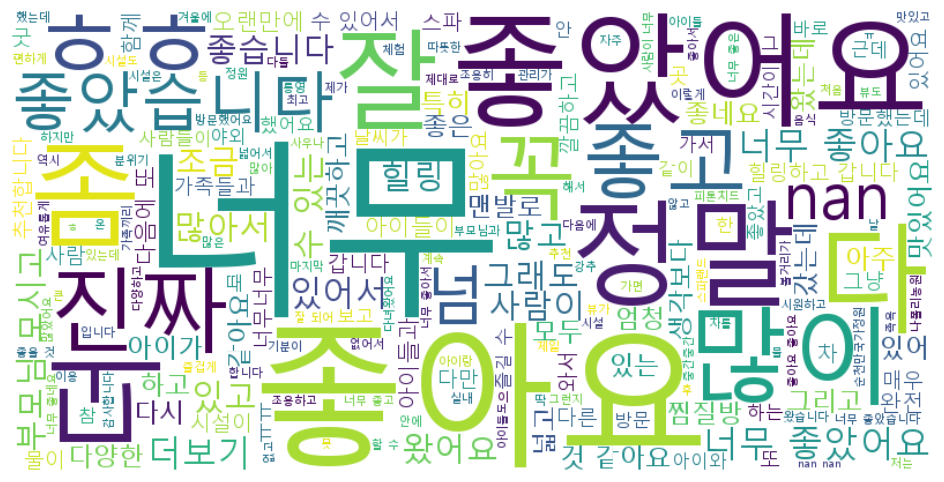

In [4]:
# 줄바꿈 문자 제거 + 문자열로 변환
r1['리뷰_전처리'] = r1['리뷰'].astype(str).str.replace('\n', ' ').str.replace('\r', ' ')

# 전체 리뷰 텍스트 합치기
text = ' '.join(r1['리뷰_전처리'].tolist())

# 한글 폰트 경로 (Windows 기준, 맑은고딕)
font_path = 'C:/Windows/Fonts/malgun.ttf'

# 워드클라우드 생성
wc = WordCloud(
    font_path=font_path,
    background_color='white',
    width=800,
    height=400
).generate(text)

# 워드클라우드 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()

**1차 워드클라우드 분석 결과 해석**
- '너무', '좋았다', '잘', '진짜', '꼭' 이런 키워드가 많아서 분석에 의미가 별로 없다.
- 감탄사 또는 긍정 표현(부사/형용사)이 대부분
- 구체적인 서비스 품질 요소(예: 청결, 접근성, 프로그램 등)은 드러나지 않음.
- 일반적인 감상만으로는 실질적 인사이트 도출에 한계가 있음.

In [5]:
# 2차 워드클라우드 분석
from konlpy.tag import Okt
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [6]:
from soynlp.tokenizer import LTokenizer

text = "안녕하세요. 테스트 문장입니다."
tokenizer = LTokenizer()
tokens = tokenizer.tokenize(text)
print(tokens)


['안녕하세요.', '테스트', '문장입니다.']


In [ ]:
# 리뷰 텍스트 전처리: 줄바꿈 문자 제거 및 문자열 변환
r1['리뷰_전처리'] = r1['리뷰'].astype(str).str.replace('\n', ' ').str.replace('\r', ' ')

# 전체 리뷰 문장 하나로 연결
text = ' '.join(r1['리뷰_전처리'].tolist())

# 형태소 분석기 초기화 (LTokenizer)
tokenizer = LTokenizer()

# (단어 리스트 추출)
tokens = tokenizer.tokenize(text)

# 6. 불용어 리스트 정의
stopwords = set(['너무', '진짜', '정말', '잘', '꼭', '이런', '거기', '저희', '하고', '있는', 'ㅎㅎ', '있어', '있고', 
                 '하면', '근데', '때문', '정도', '다녀왔어요', 'ㅎ', '좀', '많이', '있어서', 'nan'])

# 불용어 및 길이 1 이하 단어 제거
filtered = [word for word in tokens if word not in stopwords and len(word) > 1]

# 단어 빈도 계산
word_freq = Counter(filtered)

# 워드클라우드 생성
wc = WordCloud(
    font_path='C:/Windows/Fonts/malgun.ttf',  # 윈도우 한글 폰트 경로
    background_color='white',
    width=800,
    height=400
).generate_from_frequencies(word_freq)

# 결과 시각화
plt.figure(figsize=(12, 6))
plt.imshow(wc, interpolation='bilinear')
plt.axis('off')
plt.show()


NameError: name 'Counter' is not defined

**분석**
- 함께, 많이, 부모님, 모시고 -> 동반자가 많은 듯
- 긍정어가 많은 편 (많고, 많아서, 좋고, 좋아서)